# 支持向量机 

核支持向量机(通常简称为SVM) 是可以推广到更复杂模型的扩展，这些模型无法被输入空间的超平面定义。虽然支持向量机可以同时用于分类和回归，用于分类的情况，它在 SVC 中实现，类似的概念也适用于支持向量回归，后者在SVR 中实现。

## 1. 线性模型与非线性特征

线性模型在低维空间中可能非常受限，因为线和平面的灵活性有限。有一种方法可以让线性模型更加灵活，就是添加更多的特征，举个例子，添加输入特征的交互项或多项式。

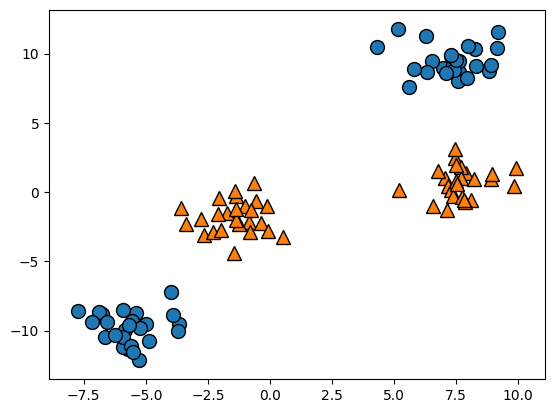

In [1]:
# 查看数据集
from sklearn.datasets import make_blobs
import mglearn
X, y = make_blobs(centers=4, random_state=8)
y = y % 2
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

d:\python\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


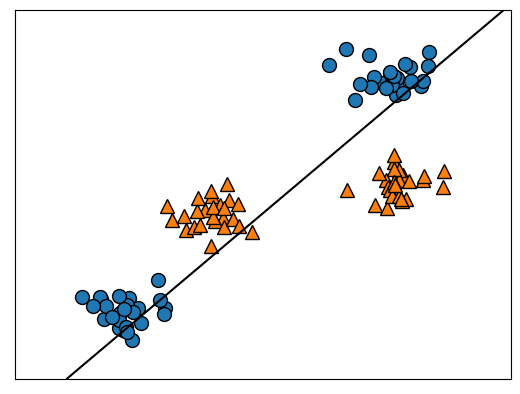

In [2]:
# 线性svm给出的决策边界
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

用于分类的线性模型只能用一条直线来划分数据点，对这个数据集无法给出较好的结果

现在我们对输入特征进行扩展，比如说添加第二个特征的平方 (feature1 ** 2)作为一个新特征。现在我们将每个数据点表示为三维点(feature0，feature1，feature1 ** 2)，而不是二维点(feature0，feature1)"。这个新的表示可以三维散点图:

C:\Users\34629\AppData\Local\Temp\ipykernel_5988\1256755675.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2],c = 'b', cmap = mglearn.cm2, s=60)
C:\Users\34629\AppData\Local\Temp\ipykernel_5988\1256755675.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2],c = 'r', marker = '^', cmap = mglearn.cm2, s=60)


Text(0.5, 0, 'feature1**2')

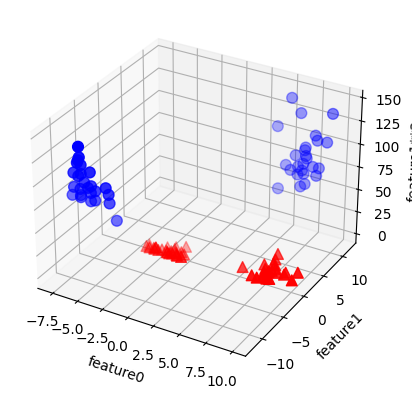

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 添加第二个特征的平方作为新特征
X_new = np.hstack([X, X[:,1:]**2])
figure = plt.figure()

# 3D可视化
# ax = Axes3D(figure)
ax = figure.add_subplot(projection='3d') 

# 首先画出所有y == 0 的点， 然后再画出所有 y == 1 的点
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2],c = 'b', cmap = mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2],c = 'r', marker = '^', cmap = mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1**2")



在数据的新表示中，现在可以用线性模型(三维空间中的平面) 将这两个类别分开。可以用线性模型拟合扩展后的数据来验证这一点

d:\python\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\34629\AppData\Local\Temp\ipykernel_5988\4074155953.py:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60)
C:\Users\34629\AppData\Local\Temp\ipykernel_5988\4074155953.py:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60)


Text(0.5, 0, 'Feature1**2')

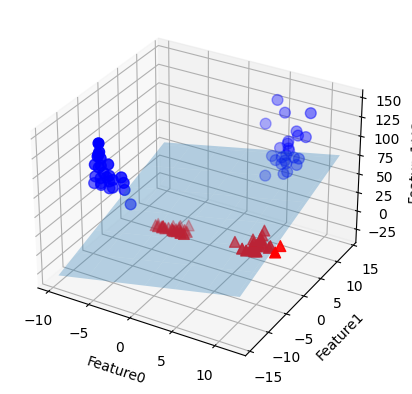

In [13]:
linear_svm_3d = LinearSVC().fit(X_new, y)
# 获取了线性SVM模型的系数（coef）和截距（intercept）。
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_    
# 显示线性决策边界
figure = plt.figure()
ax = figure.add_subplot(projection='3d')
# -2 和 +2 被加减在这两个极值上，这是为了扩展生成的数值范围，以便保证生成的数值网格超出实际数据的范围。
# 这样做可以确保生成的网格点包含了数据的所有可能取值。
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)
# 使用 meshgrid 函数生成一个二维网格，XX 和 YY 分别是对应于 xx 和 yy 的坐标矩阵。
XX, YY = np.meshgrid(xx, yy)
# coef[0]*XX + coef[1]*YY + intercept 表示了一个在三维空间中表示决策边界的平面方程。
# -coef[2] 用于将方程中的所有系数除以 coef[2]，这是为了使平面在三维空间中具有正确的比例和方向。
# coef[2] 对应于 z 维度上的系数。
ZZ = (coef[0]*XX + coef[0]*YY + intercept) / -coef[2]
#使用 plot_surface 函数绘制了决策边界的曲面。
# rstride 和 cstride 控制了绘制时的步进大小，alpha 控制了曲面的透明度。
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
# 绘制了一个散点图
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60)
ax.set_xlabel("Feature0")
ax.set_ylabel("Feature1")
ax.set_zlabel("Feature1**2")

如果将线性 SVM 模型看作原始特征的函数，那么它实际上已经不是线性的了。它不是条直线，而是一个椭圆

Text(0, 0.5, 'Feature 1')

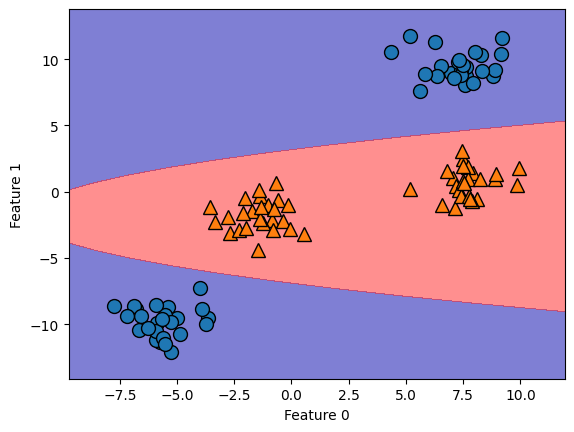

In [16]:
# 将上图给出的决策边界作为原始特征的函数
ZZ = YY **2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(),0,dec.max()], cmap=mglearn.cm2, alpha=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")  

# 2. 核技巧

向数据表示申添加非线性特征，可以让线性模型变得更强大。但是，通常来说我们并不知道要添加哪些特征，而且添加许多特征(比如100 维特征空间所有可能的交互项)的计算开销可能会很大。幸运的是，有一种巧妙的数学技巧，可以在更高维空间中学习分类器，而不用实际计算可能非常大的新的数据表示。这种技巧叫作核技巧(kernel trick)，它的原理是直接计算扩展特征表示中数据点之间的距离(更准确地说是内积)，而不用实际对扩展进行计算。